In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Ionov\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

job = pd.read_excel('Data/Задание 5.0 2 версия.xlsx')
job.head(15)

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235
8,Абрамов Е. Д.,2009-09-01,Уборщик,3,Пилигримовые станы,18,1080,18450.670588
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.000000


In [3]:
job.isna().sum()

FIO                   0
Месяц                 0
Профессия             0
Разряд                0
Оборудование          0
Вредность (балл.)     0
Объем производства    0
Доход                 0
dtype: int64

In [4]:
job.shape

(2400, 8)

In [5]:
job.dtypes

FIO                           object
Месяц                 datetime64[ns]
Профессия                     object
Разряд                         int64
Оборудование                  object
Вредность (балл.)              int64
Объем производства             int64
Доход                        float64
dtype: object

In [6]:
job.describe()

,Разряд,Вредность (балл.),Объем производства,Доход
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333,21665.570570
std,1.371417,6.567857,230.982220,4686.885527
min,3.000000,0.000000,580.000000,12180.000000
25%,4.000000,14.750000,805.000000,18076.500000
50%,5.000000,18.000000,985.000000,21057.300000
75%,6.000000,19.000000,1185.000000,25105.764706
max,7.000000,22.000000,1400.000000,36076.764706


In [7]:
unq_tech = pd.unique(job['Оборудование']) 
unq_tech,unq_tech.shape

(array(['Пилигримовые станы', 'Нагревательные печи',
        'Нагревательные печи, кантовка', 'Калибровочный стан',
        'Контрольно-измерительная аппаратура', 'Калибровочный стан, ГРП',
        'Прошивной стан', 'Нагревательные печи, нагрев',
        'Вспомогательные помещения'], dtype=object),
 (9,))

In [8]:
new_name_tech = dict(zip(unq_tech,range(0,9)))
new_name_tech

{'Пилигримовые станы': 0,
 'Нагревательные печи': 1,
 'Нагревательные печи, кантовка': 2,
 'Калибровочный стан': 3,
 'Контрольно-измерительная аппаратура': 4,
 'Калибровочный стан, ГРП': 5,
 'Прошивной стан': 6,
 'Нагревательные печи, нагрев': 7,
 'Вспомогательные помещения': 8}

In [9]:
unq_job = pd.unique(job['Профессия']) 
unq_job,unq_job.shape

(array(['Уборщик', 'Вальцовщик', 'Нагревальщик металла',
        'Оператор поста управления',
        'Контролер качества готовой продукции', 'Подручный вальцовщика',
        'Резчик горячего металла', 'Посадчик металла', 'Огнеупорщик'],
       dtype=object),
 (9,))

In [10]:
new_name_job = dict(zip(unq_job,range(0,9)))
new_name_job

{'Уборщик': 0,
 'Вальцовщик': 1,
 'Нагревальщик металла': 2,
 'Оператор поста управления': 3,
 'Контролер качества готовой продукции': 4,
 'Подручный вальцовщика': 5,
 'Резчик горячего металла': 6,
 'Посадчик металла': 7,
 'Огнеупорщик': 8}

In [11]:
job['Проф'] = list(map(lambda name_job: new_name_job[name_job],job['Профессия']))
job['Обор'] = list(map(lambda name_job: new_name_tech[name_job],job['Оборудование']))


In [12]:
#job['Работа'] =job['Профессия'].astype(str) + " : " +  job['Оборудование'].astype(str) 
job.head(10)

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Проф,Обор
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,0,0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,0,0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,0,0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,0,0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,0,0
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647,0,0
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059,0,0
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235,0,0
8,Абрамов Е. Д.,2009-09-01,Уборщик,3,Пилигримовые станы,18,1080,18450.670588,0,0
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.000000,0,0


In [13]:
job_cleaned = job.drop(['FIO','Месяц','Профессия','Оборудование'],axis=1)
job_cleaned.head()

,Разряд,Вредность (балл.),Объем производства,Доход,Проф,Обор
0,3,18,580,16638.000000,0,0
1,3,18,790,16638.000000,0,0
2,3,18,820,16638.000000,0,0
3,3,18,1200,19396.411765,0,0
4,3,18,1250,19790.470588,0,0


In [14]:
job_cleaned.dtypes

Разряд                  int64
Вредность (балл.)       int64
Объем производства      int64
Доход                 float64
Проф                    int64
Обор                    int64
dtype: object

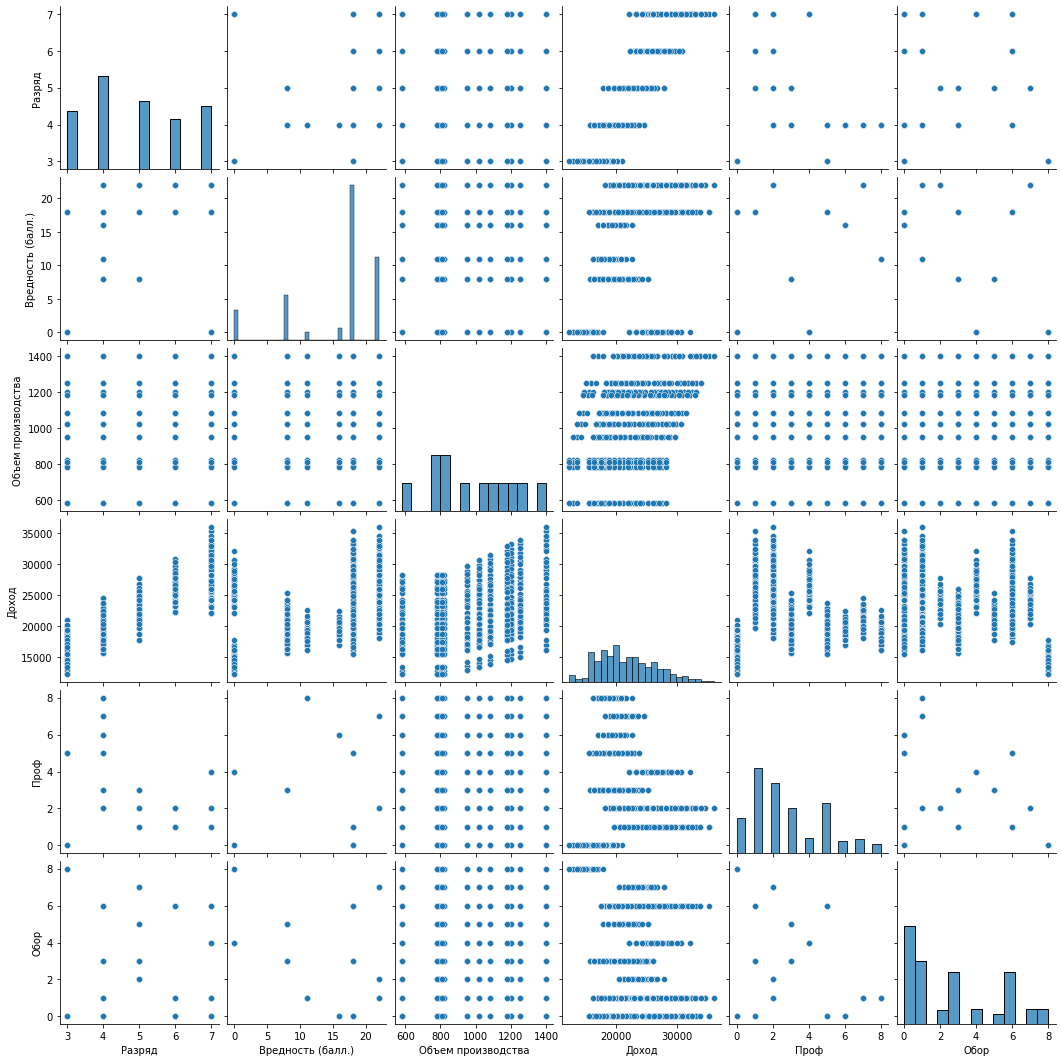

In [15]:
sns.pairplot(job_cleaned)

In [16]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

X = job_cleaned.drop(['Доход'], axis=1)
y = job_cleaned['Доход']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
clf = RandomForestRegressor(random_state=0)
partr = {'n_estimators': range(1,31,5),
         'max_depth': range(1,6,1)}

#clf = DecisionTreeRegressor(random_state=0)
#partr = {'max_depth': range(1,15),
#         'min_samples_split': range(2,24,2),
#         'min_samples_leaf': range(2,24,2)}

best_clf = GridSearchCV(clf, partr, n_jobs=22, cv=3)
best_clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=22,
             param_grid={'max_depth': range(1, 6),
                         'n_estimators': range(1, 31, 5)})

In [18]:
from sklearn.metrics import accuracy_score

y_pred = best_clf.best_estimator_.predict(X_test)

best_clf.score(X_test,y_test),best_clf.best_estimator_

(0.9623732897621712,
 RandomForestRegressor(max_depth=5, n_estimators=26, random_state=0))

In [19]:
job['Доход'].describe()

count     2400.000000
mean     21665.570570
std       4686.885527
min      12180.000000
25%      18076.500000
50%      21057.300000
75%      25105.764706
max      36076.764706
Name: Доход, dtype: float64

In [20]:
salary_min = job[job['Доход'] <= 12180]
salary_min

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Проф,Обор
468,Григорьев А. Т.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0,0,8
469,Григорьев А. Т.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.0,0,8
470,Григорьев А. Т.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.0,0,8
477,Григорьев А. Т.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.0,0,8
479,Григорьев А. Т.,2009-12-01,Уборщик,3,Вспомогательные помещения,0,810,12180.0,0,8
612,Журавлев Б. И.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0,0,8
613,Журавлев Б. И.,2009-02-01,Уборщик,3,Вспомогательные помещения,0,790,12180.0,0,8
614,Журавлев Б. И.,2009-03-01,Уборщик,3,Вспомогательные помещения,0,820,12180.0,0,8
621,Журавлев Б. И.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.0,0,8
623,Журавлев Б. И.,2009-12-01,Уборщик,3,Вспомогательные помещения,0,810,12180.0,0,8


In [21]:
salary_min.describe()

,Разряд,Вредность (балл.),Объем производства,Доход,Проф,Обор
count,30.0,30.0,30.000000,30.0,30.0,30.0
mean,3.0,0.0,756.000000,12180.0,0.0,8.0
std,0.0,0.0,90.652805,0.0,0.0,0.0
min,3.0,0.0,580.000000,12180.0,0.0,8.0
25%,3.0,0.0,780.000000,12180.0,0.0,8.0
50%,3.0,0.0,790.000000,12180.0,0.0,8.0
75%,3.0,0.0,810.000000,12180.0,0.0,8.0
max,3.0,0.0,820.000000,12180.0,0.0,8.0


In [22]:
cleaner = job[job['Профессия'] == 'Уборщик']
cleaner

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Проф,Обор
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,0,0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,0,0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,0,0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,0,0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,0,0
...,...,...,...,...,...,...,...,...,...,...
2299,Чернышев Д. В.,2009-08-01,Уборщик,3,Вспомогательные помещения,0,1180,14544.352941,0,8
2300,Чернышев Д. В.,2009-09-01,Уборщик,3,Вспомогательные помещения,0,1080,13827.882353,0,8
2301,Чернышев Д. В.,2009-10-01,Уборщик,3,Вспомогательные помещения,0,780,12180.000000,0,8
2302,Чернышев Д. В.,2009-11-01,Уборщик,3,Вспомогательные помещения,0,1020,13398.000000,0,8


In [23]:
cleaner['Оборудование'].unique()

array(['Пилигримовые станы', 'Вспомогательные помещения'], dtype=object)

In [24]:
cleaner2 = job[(job['Профессия'] == 'Уборщик') & (job['Оборудование'] != 'Вспомогательные помещения')]
cleaner2 

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Проф,Обор
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000,0,0
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000,0,0
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000,0,0
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765,0,0
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588,0,0
...,...,...,...,...,...,...,...,...,...,...
1987,Сорокин М. А.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,17784.352941,0,0
1988,Сорокин М. А.,2009-09-01,Уборщик,3,Пилигримовые станы,18,1080,17067.882353,0,0
1989,Сорокин М. А.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,15420.000000,0,0
1990,Сорокин М. А.,2009-11-01,Уборщик,3,Пилигримовые станы,18,1020,16638.000000,0,0


In [25]:
cleaner2.describe()

,Разряд,Вредность (балл.),Объем производства,Доход,Проф,Обор
count,144.0,144.0,144.000000,144.000000,144.0,144.0
mean,3.0,18.0,988.333333,16915.930882,0.0,0.0
std,0.0,0.0,231.740149,1412.016419,0.0,0.0
min,3.0,18.0,580.000000,15420.000000,0.0,0.0
25%,3.0,18.0,805.000000,15420.000000,0.0,0.0
50%,3.0,18.0,985.000000,16638.000000,0.0,0.0
75%,3.0,18.0,1185.000000,17927.647059,0.0,0.0
max,3.0,18.0,1400.000000,20972.647059,0.0,0.0


In [36]:
test = pd.DataFrame({'Разряд':[3],'Вредность (балл.)':[0],'Объем производства':[820],'Проф':[5],'Обор':[6]})

best_clf.best_estimator_.predict(test)

array([14680.05163365])

In [33]:
salary_max = job[job['Доход'] >= 20076]
salary_max

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход,Проф,Обор
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059,0,0
18,Абрамов Ф. М.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20166.617647,0,0
24,Агафонов С. И.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,22260.000000,1,0
25,Агафонов С. И.,2009-02-01,Вальцовщик,6,Пилигримовые станы,18,790,22260.000000,1,0
26,Агафонов С. И.,2009-03-01,Вальцовщик,6,Пилигримовые станы,18,820,22260.000000,1,0
...,...,...,...,...,...,...,...,...,...,...
2392,Яковлев Д. И.,2009-05-01,Подручный вальцовщика,4,Прошивной стан,18,1250,22440.176471,5,6
2394,Яковлев Д. И.,2009-07-01,Подручный вальцовщика,4,Прошивной стан,18,1400,23811.617647,5,6
2395,Яковлев Д. И.,2009-08-01,Подручный вальцовщика,4,Прошивной стан,18,1180,21800.170588,5,6
2396,Яковлев Д. И.,2009-09-01,Подручный вальцовщика,4,Прошивной стан,18,1080,20885.876471,5,6


In [28]:
test = pd.DataFrame({'Разряд':[3],'Вредность (балл.)':[0],'Объем производства':[500],'Проф':[2],'Обор':[1]})

best_clf.best_estimator_.predict(test)

array([14992.95348064])